In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

In [2]:
boston=datasets.load_boston()
X=boston.data
y=boston.target

In [3]:
df=pd.DataFrame(X,columns=boston.feature_names)
df['TARGET']=y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df.drop('TARGET',axis=1))

In [7]:
scaled_df=pd.DataFrame(scaled,columns=df.columns[:-1])
scaled_df['TARGET']=df['TARGET']

<AxesSubplot:>

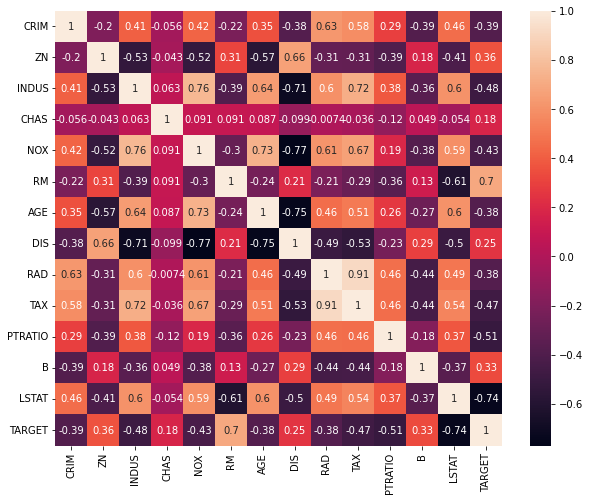

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.shape

(506, 14)

In [10]:
X=df[['LSTAT','TAX','PTRATIO','B']][:450]
y=df.loc[:450,'TARGET']
X_test=df[['LSTAT','TAX','PTRATIO','B']][451:]
y_test=df.loc[451:,'TARGET']

In [11]:
y_test

451    15.2
452    16.1
453    17.8
454    14.9
455    14.1
456    12.7
457    13.5
458    14.9
459    20.0
460    16.4
461    17.7
462    19.5
463    20.2
464    21.4
465    19.9
466    19.0
467    19.1
468    19.1
469    20.1
470    19.9
471    19.6
472    23.2
473    29.8
474    13.8
475    13.3
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET, dtype: float64

In [12]:
from copy import deepcopy

For the purpose of making it a challenging task, I have taken the Boston Dataset and will attempt to regress on the same

In [89]:
class Perceptron:
    def __init__(self,input_shape):
        self.weights=np.ones(input_shape)
        self.lr=0.001
        self.losses=[]
        self.epoch_losses=[]
    
    def adjustWeights(self,x,y):
        oldWeights=deepcopy(self.weights)
        for i in range(len(oldWeights)):
            oldWeights[i]+=self.lr
            up_prediction=self.predict(x,weights=oldWeights)
            up_loss=self.MSE(up_prediction,y)
            oldWeights[i]=self.weights[i]-self.lr
            down_prediction=self.predict(x,weights=oldWeights)
            down_loss=self.MSE(down_prediction,y)
            oldWeights[i]=self.weights[i]
            if(up_loss>down_loss):
                self.weights[i]-=self.lr
            else:
                self.weights[i]+=self.lr
        
            self.clipWeights()
        return 
    
    def clipWeights(self,threshold=0.7):
        self.weights=np.array([threshold if w>1.00 else w for w in self.weights])
        
    def MSE(self,pred,y):
        return (pred-y)**2
    
    def fit(self,x,y,num_epochs=5):
        for e in range(num_epochs):
            epoch_loss=0
            weights=self.weights
            for i in range(x.shape[0]):
                self.adjustWeights(x.iloc[i,:],y[i])
                prediction=self.predict(x.iloc[i,:])
                loss=self.MSE(prediction,y[i])
                self.losses.append(loss)
                epoch_loss+=loss
            epoch_loss/=x.shape[0]
            self.epoch_losses.append(epoch_loss)
                
    def test(self,x):
        predictions=[]
        for i in range(x.shape[0]):
            prediction=self.predict(x.iloc[i,:])
            predictions.append(prediction)
        return predictions
        
    def predict(self,x,weights=None):
        if weights is None:
            weights=self.weights
        prediction=np.dot(x,weights)
        return prediction

net=Perceptron(input_shape=X.shape[1])

In [90]:
net.weights

array([1., 1., 1., 1.])

In [91]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
446    14.9
447    12.6
448    14.1
449    13.0
450    13.4
Name: TARGET, Length: 451, dtype: float64

In [92]:
net.fit(X,y)

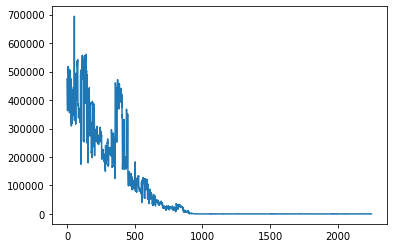

In [93]:
plt.plot(net.losses)

In [94]:
net.weights

array([0.012, 0.012, 0.012, 0.012])

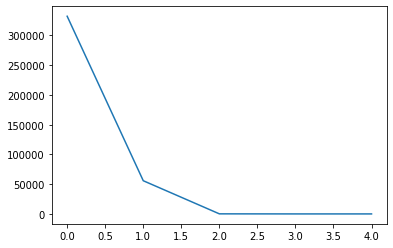

In [95]:
plt.plot(net.epoch_losses)

In [96]:
min(np.sqrt(net.epoch_losses))

7.614537268523679

c:\users\ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

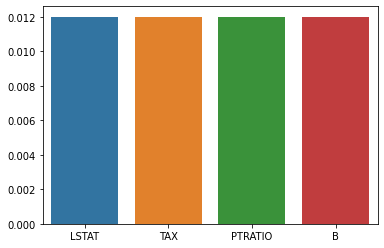

In [97]:
sns.barplot(X.columns,net.weights)


In [98]:
preds=net.test(X_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
print("MAE:",mean_absolute_error(y_test,preds))
print("RMSE:",np.sqrt(mean_squared_error(y_test,preds)))

MAE: 7.2547221818189
RMSE: 8.247735542963198


The MAE and RMSE values presented above are validation. Thus, we can see train RMSE is 7.6 and test RMSE is 8.24.